# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# For Data related operations
import pandas as pd
import numpy as np

#Data Visualization libraries 
import seaborn as sns 
from matplotlib import pyplot as plt 

# DecisionTree Model
from sklearn.tree import DecisionTreeRegressor

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

#RandomForest Regression Classifier Model
from sklearn.ensemble import RandomForestClassifier

# Data scaling (Optional) 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import library for preparing data
from sklearn.model_selection import train_test_split

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 

import warnings
warnings.filterwarnings("ignore")

## Data Overview

- Observations
- Sanity checks

**Reading the csv**

In [2]:
data = pd.read_csv('ExtraaLearn.csv')

**Data Preview**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [4]:
data.shape

(4612, 15)

In [5]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [6]:
data.isnull().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.0,46.201214,13.161454,18.0,36.00000,51.000,57.00000,63.000
website_visits,4612.0,3.566782,2.829134,0.0,2.00000,3.000,5.00000,30.000
time_spent_on_website,4612.0,724.011275,743.828683,0.0,148.75000,376.000,1336.75000,2537.000
page_views_per_visit,4612.0,3.026126,1.968125,0.0,2.07775,2.792,3.75625,18.434
status,4612.0,0.298569,0.457680,0.0,0.00000,0.000,1.00000,1.000


## Initial obseravtions: 

1. There are total 15 columns & 4612 records in the ExtraaLearn Dataset. 
2. Three datatypes are distributed among this 15 columns i.e. Object - 10, int64 - 4, float64 - 1. 
3. There are no null or missing values present in the data.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [8]:
#Dropping the ID column which is not relevant for our model
data = data.drop(columns = 'ID')

In [9]:
data.head(3)

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0


## Univariant analysis

#### Separating continous & categorical variables

In [10]:
#data['current_occupation'] = data['current_occupation'].apply(lambda x : 0 if x == 'Unemployed' else 1 if x == 'Student' else 2)
#data['status'] = data['status'].apply(lambda x : 'yes' if x == 1 else 'no' )


In [11]:
numeric_data = data.select_dtypes(include=[np.number])
categorical_data = data.select_dtypes(exclude=[np.number])


In [12]:

#numeric_data.shape[1]
print('Total no columns from both data sets: ', categorical_data.shape[1] + numeric_data.shape[1])

Total no columns from both data sets:  14


In [13]:
categorical_data.head()

,current_occupation,first_interaction,profile_completed,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral
0,Unemployed,Website,High,Website Activity,Yes,No,Yes,No,No
1,Professional,Mobile App,Medium,Website Activity,No,No,No,Yes,No
2,Professional,Website,Medium,Website Activity,No,No,Yes,No,No
3,Unemployed,Website,High,Website Activity,No,No,No,No,No
4,Student,Website,High,Email Activity,No,No,No,No,No


In [14]:
numeric_data.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
0,57,7,1639,1.861,1
1,56,2,83,0.320,0
2,52,3,330,0.074,0
3,53,4,464,2.057,1
4,23,4,600,16.914,0


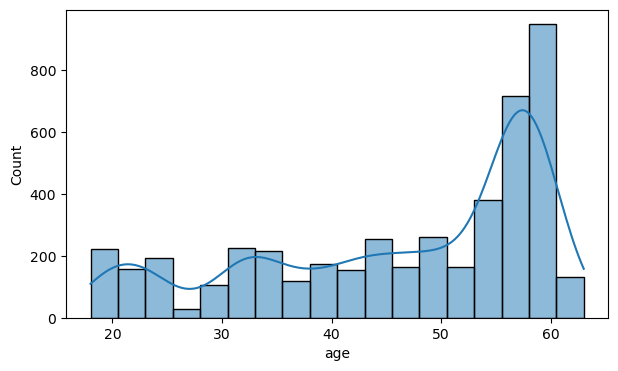

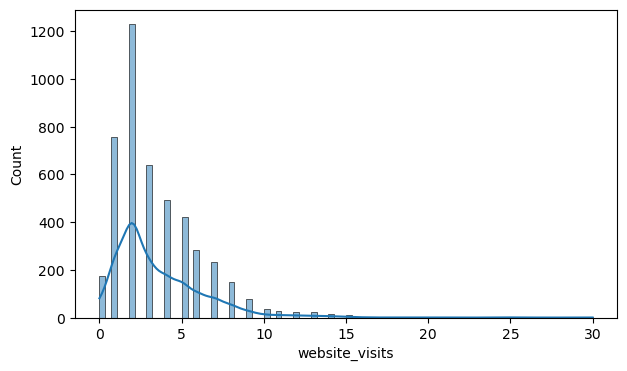

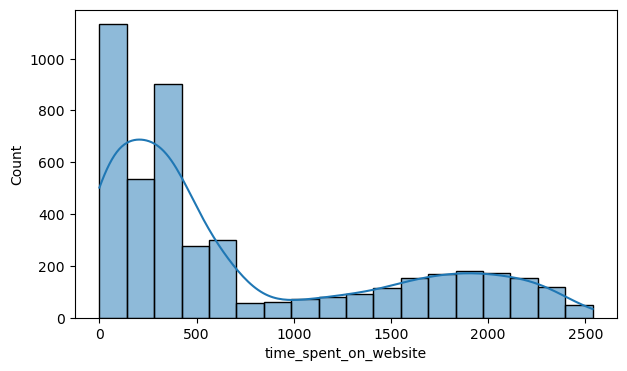

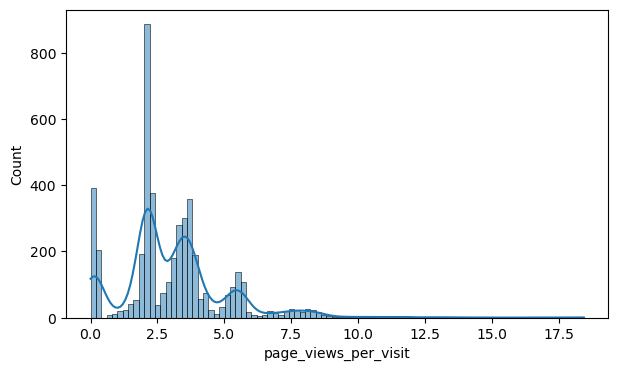

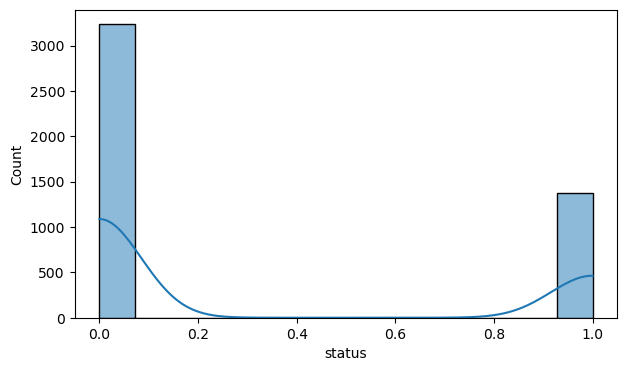

In [15]:
#Analyzing the numeric features from our dataset
for i in numeric_data.columns: 
    plt.figure(figsize = (7,4)) 
    sns.histplot(data = numeric_data , x = i, kde = True)
    #sns.boxplot(data = numeric_data , x = i)
    plt.show()

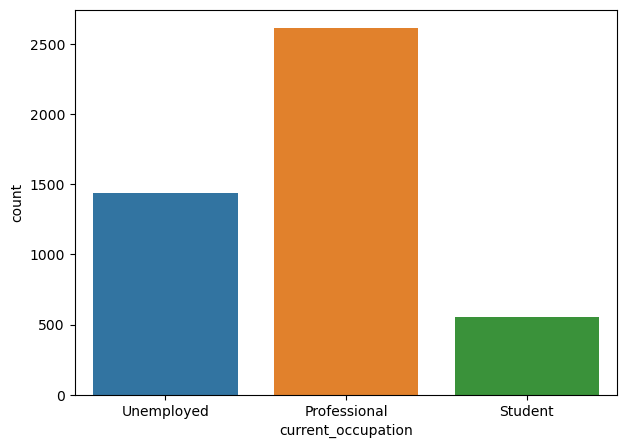

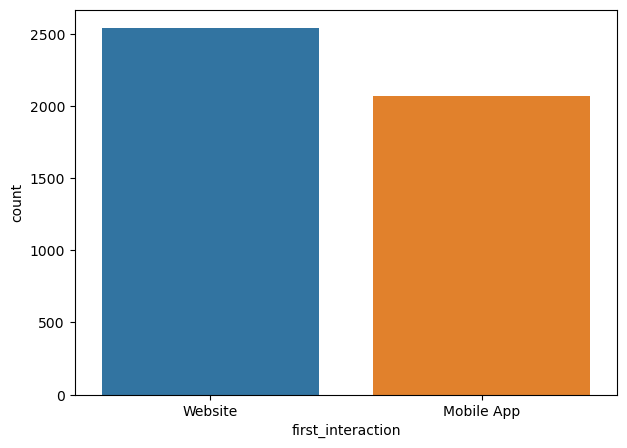

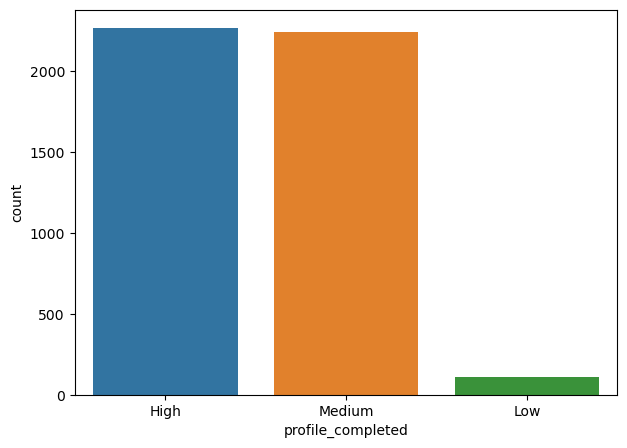

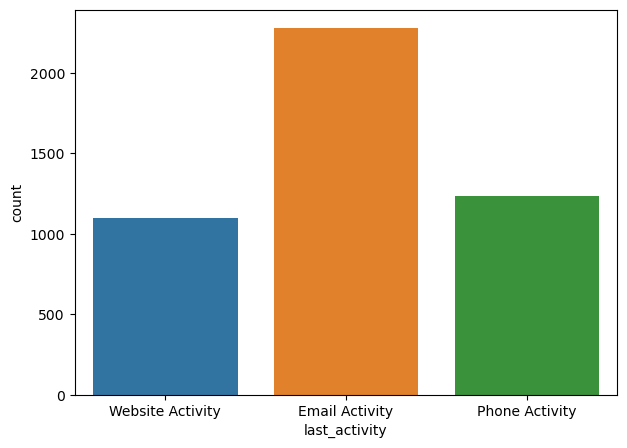

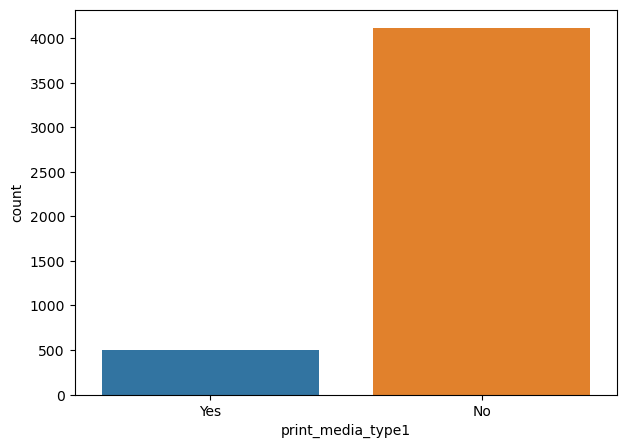

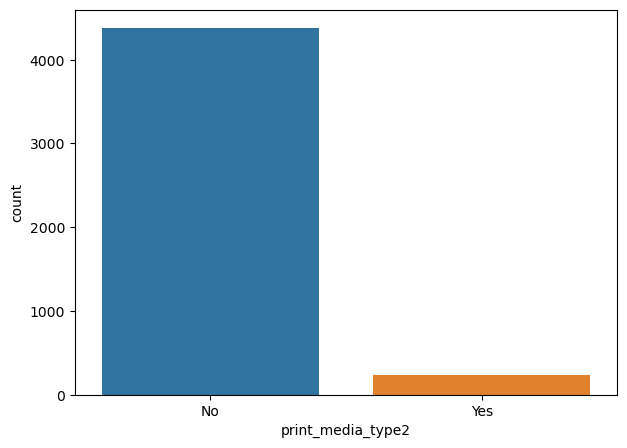

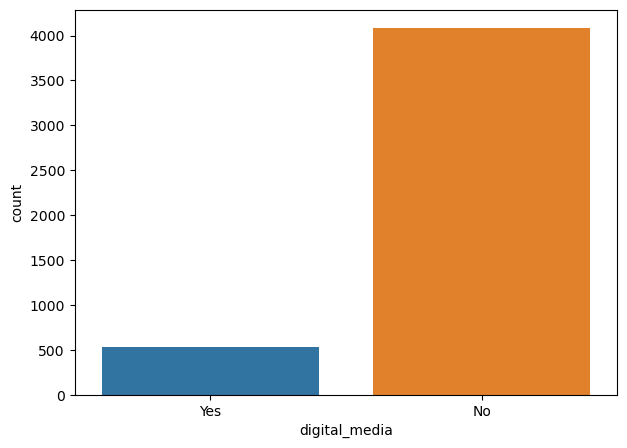

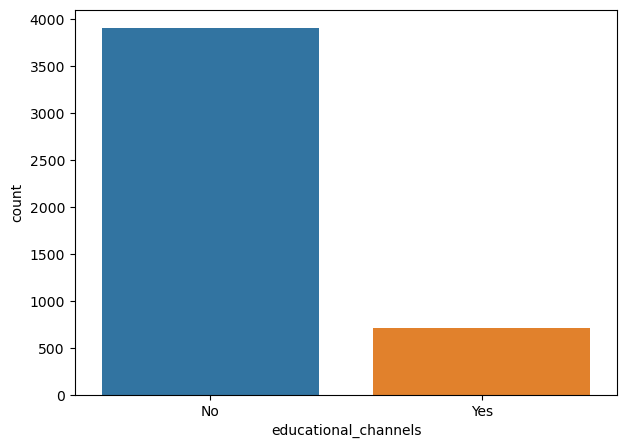

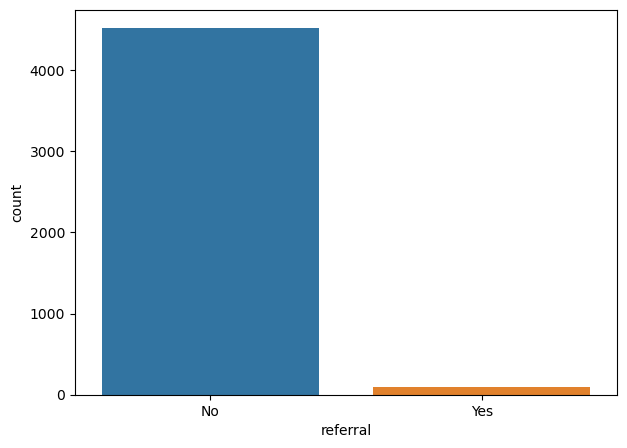

In [16]:
#Analyzing the categorical faetures
for i in categorical_data.columns: 
    plt.figure(figsize = (7, 5))
    sns.countplot( x = i ,data = categorical_data  )
    plt.show()
    


In [17]:
# data['first_interaction'] = data['first_interaction'].apply(lambda x : 0 if x == 'Website' else 1)
# data['last_activity'] = data['last_activity'].apply(lambda x : 0 if x == 'Email Activity' else 1 if x == 'Phone Activity' else 2)
# data['profile_completed'] = data['profile_completed'].apply(lambda x : 0 if x == 'Low' else 1 if x == 'Medium' else 2)
# data['print_media_type1'] = data['print_media_type1'].apply(lambda x : 0 if x == 'No' else 1)
# data['print_media_type2'] = data['print_media_type2'].apply(lambda x : 0 if x == 'No' else 1)
# data['digital_media'] = data['digital_media'].apply(lambda x : 0 if x == 'No' else 1)
# data['educational_channels'] = data['educational_channels'].apply(lambda x : 0 if x == 'No' else 1)
# data['referral'] = data['referral'].apply(lambda x : 0 if x == 'No' else 1)


#### Bivariant Analysis 

status                0     1   All
first_interaction                  
Mobile App         1852   218  2070
Website            1383  1159  2542
All                3235  1377  4612


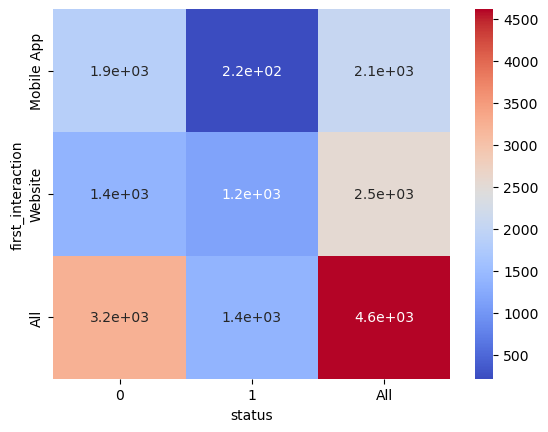

In [18]:
ct_fs = pd.crosstab(data['first_interaction'], data['status'], margins=True )
sns.heatmap(ct_fs, cmap='coolwarm', annot=True)
print(ct_fs)

status                0     1   All
profile_completed                  
High               1318   946  2264
Low                  99     8   107
Medium             1818   423  2241
All                3235  1377  4612


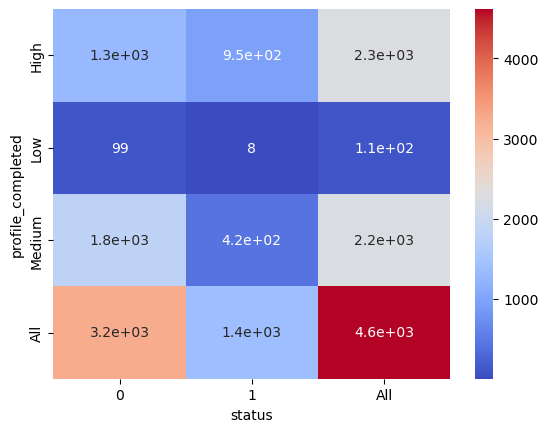

In [19]:
ct_pc = pd.crosstab(data['profile_completed'], data['status'], margins=True )
sns.heatmap(ct_pc, cmap='coolwarm', annot=True)
print(ct_pc)

status                0     1   All
print_media_type1                  
No                 2897  1218  4115
Yes                 338   159   497
All                3235  1377  4612


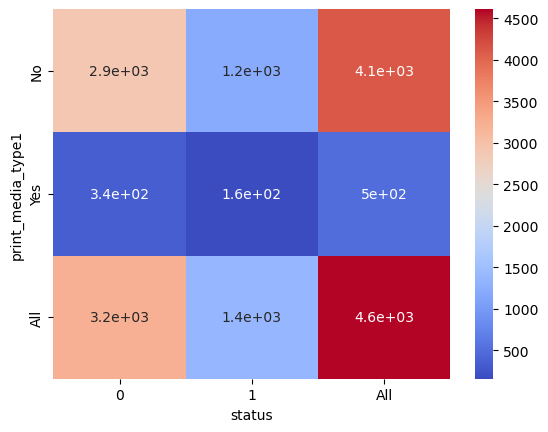

In [20]:
ct_pm1 = pd.crosstab(data['print_media_type1'], data['status'], margins=True )
sns.heatmap(ct_pm1, cmap='coolwarm', annot=True)
print(ct_pm1)

status                0     1   All
print_media_type2                  
No                 3077  1302  4379
Yes                 158    75   233
All                3235  1377  4612


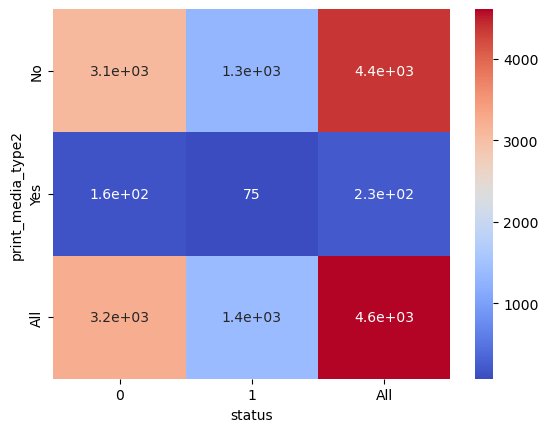

In [21]:
ct_pm2 = pd.crosstab(data['print_media_type2'], data['status'], margins=True )
sns.heatmap(ct_pm2, cmap='coolwarm', annot=True)
print(ct_pm2)

status       0     1   All
referral                  
No        3205  1314  4519
Yes         30    63    93
All       3235  1377  4612


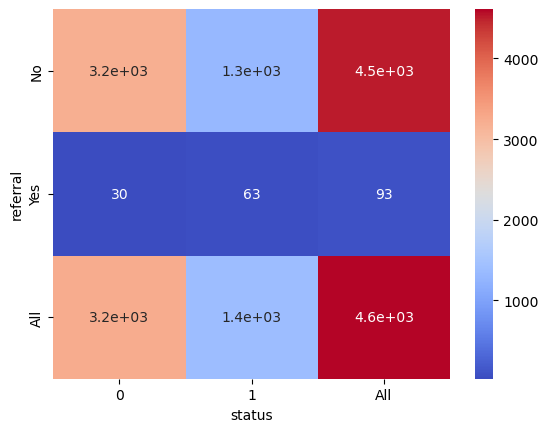

In [22]:
ct_rf = pd.crosstab(data['referral'], data['status'], margins=True )
sns.heatmap(ct_rf, cmap='coolwarm', annot=True)
print(ct_rf)

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'age'),
  Text(1.5, 0, 'website_visits'),
  Text(2.5, 0, 'time_spent_on_website'),
  Text(3.5, 0, 'page_views_per_visit'),
  Text(4.5, 0, 'status')])

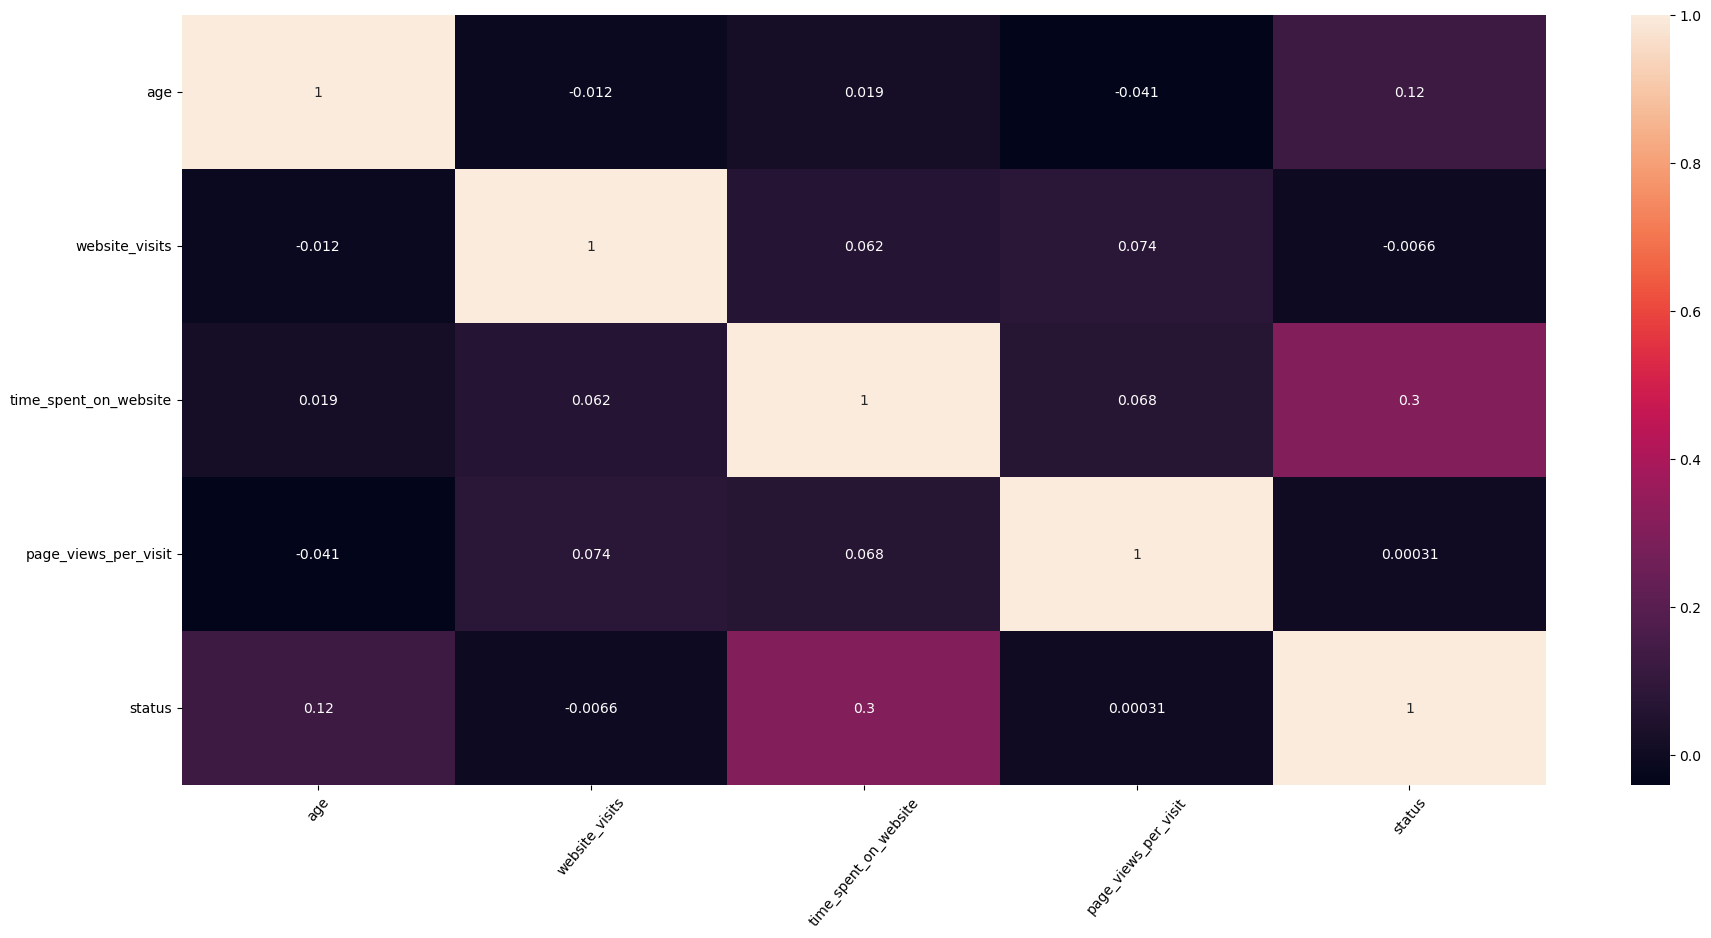

In [23]:
fig = plt.figure(figsize = (22, 10))
corr = data.corr()
sns.heatmap(corr, annot = True)
plt.xticks(rotation = 50)

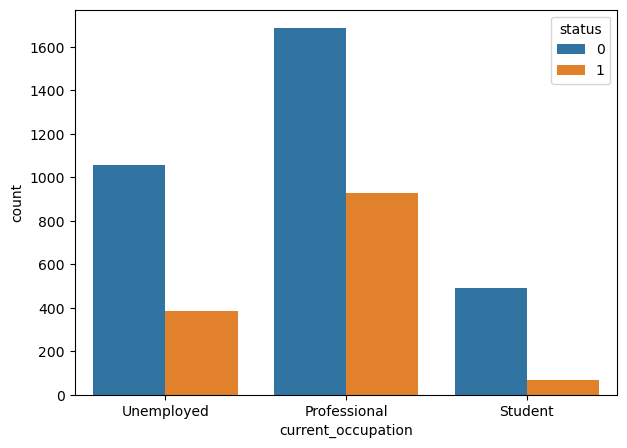

In [24]:
plt.figure(figsize = (7, 5))
sns.countplot( x = 'current_occupation' ,hue = 'status', data = data  )
plt.show()

### Observations from EDA: 

1. First_Interaction :  Number of leads approached via Website were more compared to the Mobile App.
2. Profile completion : 90% of the data(leads) were completed their profile either Medium or High.
3. Last_Interaction: The last interaction ended between the lead and ExtraaLearn is mostly by email (50%) when compared to Phone and Website. 
4. ExtraaLearn Ad reach : ExtraaLearn commercials have been more popular in either Newspaper (PrintMedia1) - 12.5% or Digital media - 12.5% when compared to Magazine(PrintMedia2) which is relatively less i.e. ~ < 5%. 
5. Educational Channels: Extraalearn was able to reach through some education channels like online forums , discussion threads & educational websites < 15%

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

### Answers for above (Bivariant analysis) : 

1. Students were the most prominent category which showing interest towards the Extraalearn compared to Professional. Where Unemployed is the least category compared to other two i.e. Student & Professional. 
2. Websites having more impact than the Mobile App when it comes to the First Interaction. 
3. 84% of the prospects became leads via Website interaction and other 16% were through Mobile App. 
4. Compared to all three mediums Newspaper is having a better conversion rate compared to Magazines or Digital Media. 
5. Profile completion playing a quiet significant role interms of converting the prospects into leads whereas we see 68% of Fully completed porspects did convert into leads , compared to Medium which is having conversion rate of 30% & Low with conversion rate < 1%.



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## EDA

- It is a good idea to explore the data once again after manipulating it.

In [25]:
# data['first_interaction'] = data['first_interaction'].apply(lambda x : 0 if x == 'Website' else 1)
# data['last_activity'] = data['last_activity'].apply(lambda x : 0 if x == 'Email Activity' else 1 if x == 'Phone Activity' else 2)
# 
# data['print_media_type1'] = data['print_media_type1'].apply(lambda x : 0 if x == 'No' else 1)
# data['print_media_type2'] = data['print_media_type2'].apply(lambda x : 0 if x == 'No' else 1)
# data['digital_media'] = data['digital_media'].apply(lambda x : 0 if x == 'No' else 1)
# data['educational_channels'] = data['educational_channels'].apply(lambda x : 0 if x == 'No' else 1)
# data['referral'] = data['referral'].apply(lambda x : 0 if x == 'No' else 1)

In [26]:
data['current_occupation'] = data['current_occupation'].apply(lambda x : 0 if x == 'Unemployed' else 1 if x == 'Student' else 2)
data['profile_completed'] = data['profile_completed'].apply(lambda x : 0 if x == 'Low' else 1 if x == 'Medium' else 2)

In [27]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns = x.select_dtypes(include = ["object", "category"]).columns.tolist(),
        drop_first = True,
    )
    return x


data = encode_cat_vars(data)
data.head()

,age,current_occupation,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,status,first_interaction_Website,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,0,2,7,1639,1.861,1,1,0,1,1,0,1,0,0
1,56,2,1,2,83,0.320,0,0,0,1,0,0,0,1,0
2,52,2,1,3,330,0.074,0,1,0,1,0,0,1,0,0
3,53,0,2,4,464,2.057,1,1,0,1,0,0,0,0,0
4,23,1,2,4,600,16.914,0,1,0,0,0,0,0,0,0


## Building a Decision Tree model

In [28]:
# Splitting the data in 70:30 ratio of train to test data
# Separate the dependent and indepedent variable
Y = data['status']
X = data.drop(columns = {'status'})
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

In [29]:
# Defining the Descision tree regressor
dt = DecisionTreeClassifier(min_samples_split = 2)

# Fitting Descision Tree regressor to train dataset
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
#Predict the response for test dataset
y_pred = dt.predict(X_test)

In [31]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8070809248554913


## Do we need to prune the tree?

In [32]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_train = clf.predict(X_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))

Test Accuracy: 0.8085260115606936
Train Accuracy: 0.8190830235439901


Model accuracy score with criterion entropy: 0.8085


[Text(0.3933633132482672, 0.9761904761904762, 'X[6] <= 0.5\ngini = 0.417\nsamples = 3228\nvalue = [2273, 955]'),
 Text(0.12781830891619408, 0.9285714285714286, 'X[4] <= 419.5\ngini = 0.181\nsamples = 1437\nvalue = [1292, 145]'),
 Text(0.01638311279143037, 0.8809523809523809, 'X[0] <= 20.5\ngini = 0.012\nsamples = 814\nvalue = [809, 5]'),
 Text(0.005040957781978576, 0.8333333333333334, 'X[5] <= 3.54\ngini = 0.18\nsamples = 30\nvalue = [27, 3]'),
 Text(0.002520478890989288, 0.7857142857142857, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.007561436672967864, 0.7857142857142857, 'X[3] <= 3.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(0.005040957781978576, 0.7380952380952381, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.010081915563957152, 0.7380952380952381, 'X[5] <= 4.584\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.007561436672967864, 0.6904761904761905, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.01260239445494644, 0.6904761904761905, 'X[5] <= 6.

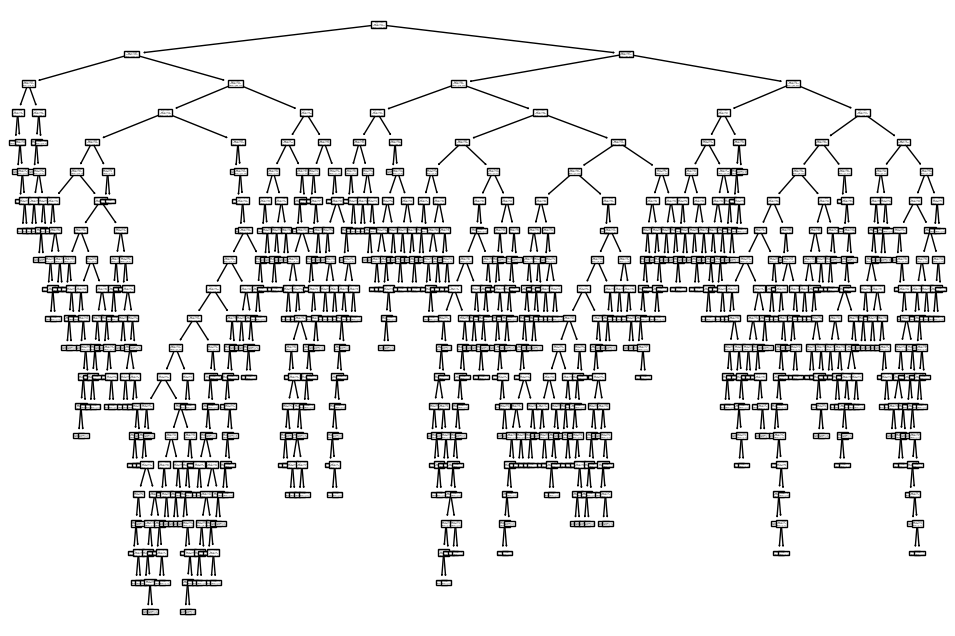

In [33]:

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
y_pred = dt.predict(X_train)
y_pred
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dt.fit(X_train, y_train))

In [34]:
#Plotting the Decision Tree
from sklearn.tree import plot_tree

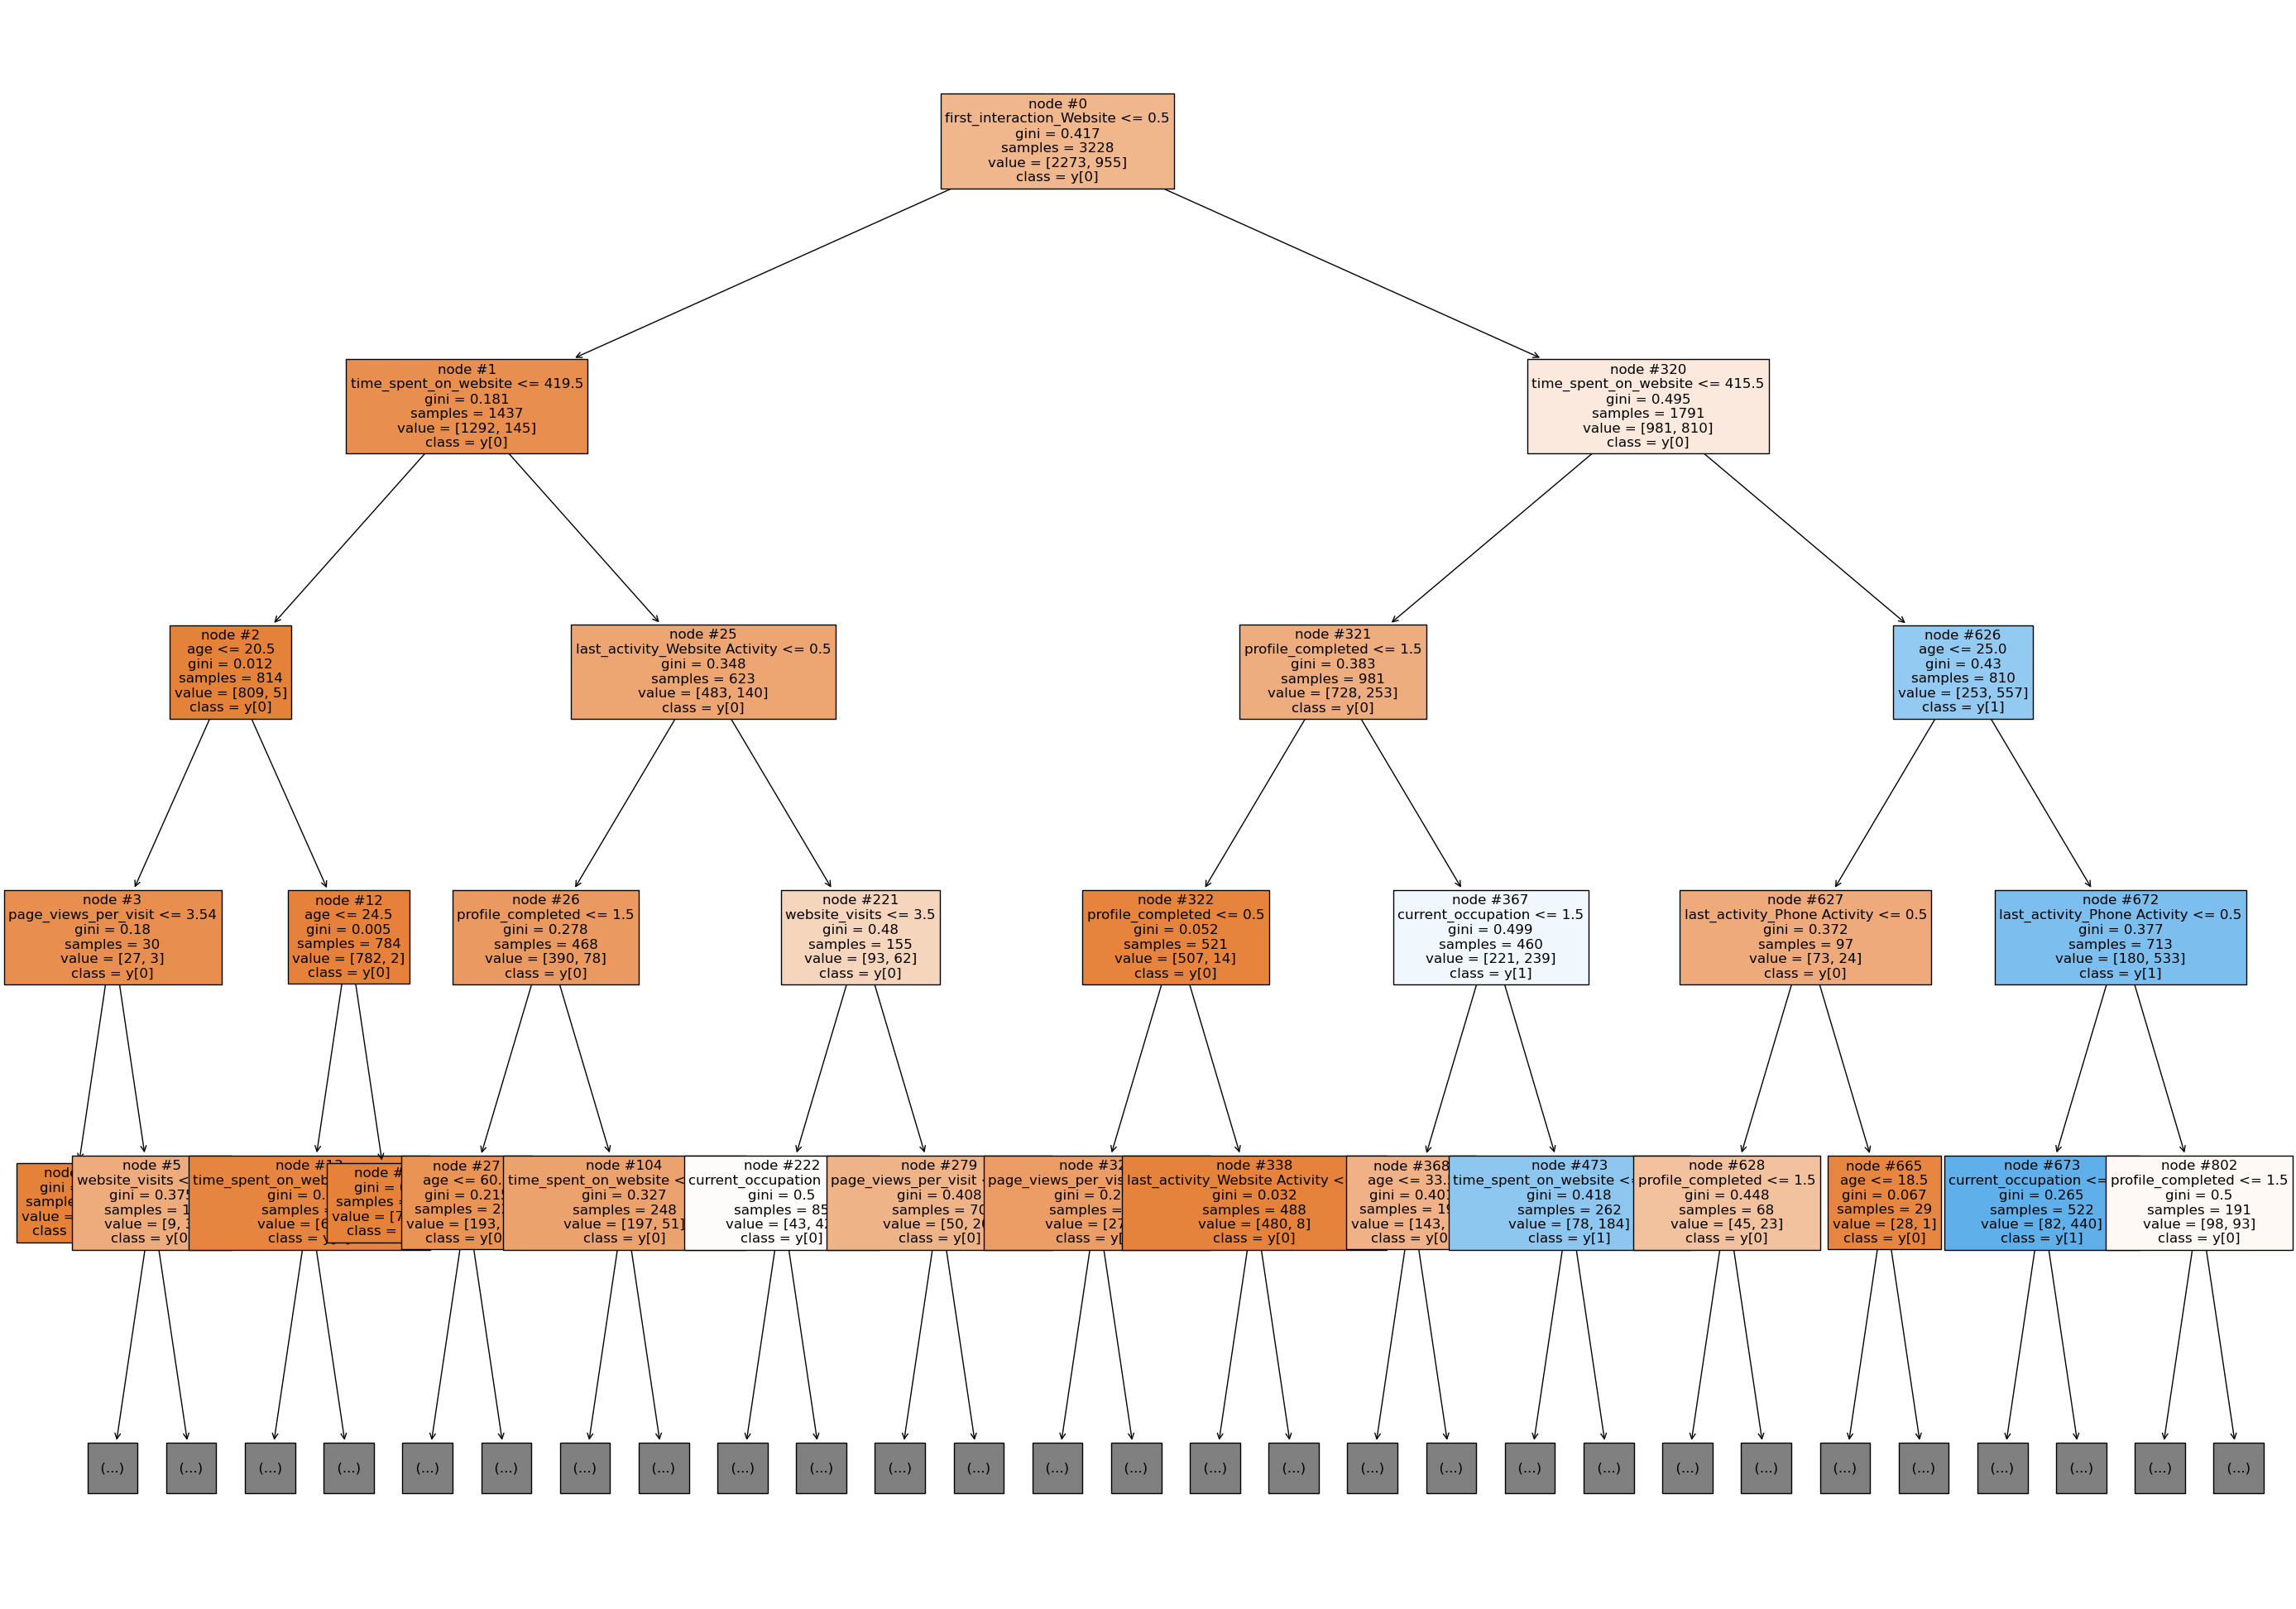

In [35]:
features = list(X.columns)

plt.figure(figsize = (35, 25))
plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)
plt.show()

<AxesSubplot:xlabel='Importance'>

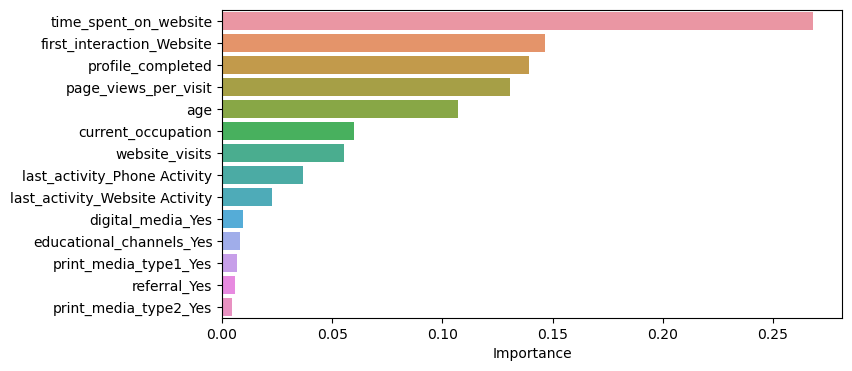

In [36]:
#Fetching DT Feature Importance
importances = dt.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 4))
sns.barplot(importance_df.Importance,importance_df.index)

## Building a Random Forest model

In [37]:
rf = RandomForestClassifier(n_estimators = 200, max_depth = 5, min_samples_split = 2)

# Hyperparameters, we have randomly choosen them for now but we can tune these hyperparameters and get the best model. 

# Fitting the model
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [38]:
#RF Test Dataset accuracy score
rf.score(X_test,y_test)

0.8475433526011561

In [39]:
#RF Train Dataset accuracy score
rf.score(X_train,y_train)

0.8630731102850062

<AxesSubplot:xlabel='Importance'>

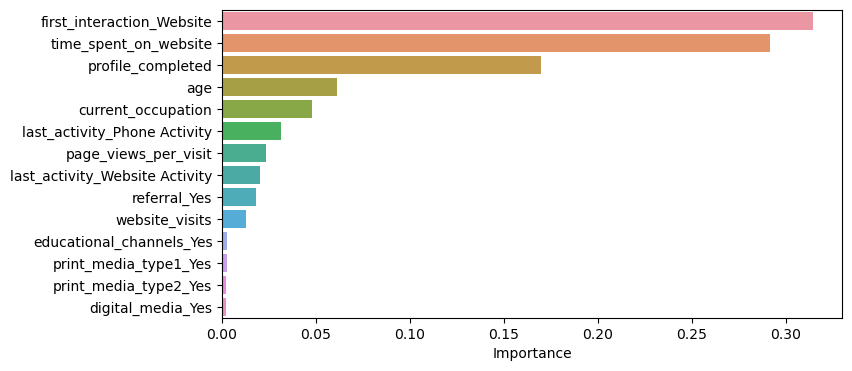

In [40]:
#Fetching RF Feature Importance
importances = rf.feature_importances_
columns = X.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (8, 4))
sns.barplot(importance_df.Importance, importance_df.index)

## Model Observations:

1. Both **Decision Tree** & **Random Forest** truned out as good models with Accuracy score **> 80%** & slight Over Fitting. 
2. Among both these models **Random Forest** gave model Accuracy score close to **87%** on Training data set and **85%** on Test data set, this considered to be best model compared to Decision Tree. 
3. Both models gave similar significant features which helps in predicting the model accuracy. 


## Do we need to prune the tree?

Unlike Decision Tree pruning does not required for Random Forest

## Actionable Insights and Recommendations

1. **Time_spent_on_website** - Users (Prospects) higher they spent time on the website which are likely to convert as Leads. Extraalearn Website needs to be more attractive to the users to keep them engaged in the Website about the content and demonstration of the course previews which can potentially help to get more conversion rate.   
2. **First_interaction** Website has a better first time reach with customers ompared to the MobileApp. More details in the data are required in order to provide more analysis, if the MobileApp is only limited to Android or IOS type. 
3. **Profile_completion** also takes further significance whereas High & Medium are two important factors contributes to the Lead conversion status. The organization needs to re-evaluate the profile section, if the infomration is totally relevant & signifiant to their business or not. This can be helpful to trim down the details which are required at the Profile page and helps the user to complete their profile 100%.  
4. **Current_occupation** Most of the leads who converted were belongs to **Professional** category , this could be due to the course fee as working professionals can afford the learning content more than **Unemployed or Student**. Organization can think of giving some promotional benefits to students with a certain % of discounts to improve the conversion rate. 
5. **Referral** seems do not have much influence on the conversion rate, This could be due to either the Institution does not have any communication with Alumni group post the completion of the course or The training courses are not helping students on finding any job opportunities. More details required here , if the student who complete training program with ExtraaLearn are able to place in good companies then Oraganization Website can list the Alumni with respective placement details. Also this can be slightly encouraged with some referral bonus for all the referrals. 
6. **Advertisement** Magazine promotions has to be improved more as it's the least when compared to other platfroms such as Digital media  & Newspaper advertisements.